# Part 6A - NLP Preprocessing - Movie Reviews

## Sentiment Analysis and Rating Prediction of Movie Reviews

#### Overview:

This project is an extension of the movies project. This portion focuses on applying Natural Language Processing (NLP) techniques to analyze a dataset of movie reviews. Students will leverage NLP tools such as NLTK, SpaCy, wordcloud, and Scikit-Learn to explore, analyze, and model text data. The ultimate goal is to establish a relationship between the textual content of the reviews and their associated ratings and subsequently predict these ratings.

#### Dataset: TMDB Movie Reviews

[![Image](https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1700174921__pastedimage0.png)](https://drive.google.com/file/d/10XnBycJ2bGStZJ2kWoyzZRrInKJlaiYZ/view?usp=sharing)

[TMDB movie reviews](https://drive.google.com/file/d/1vLUzSYleJXqsjNMsq76yTQ5fmNlSHFJI/view?usp=sharing). Ratings range from 1 to 10

- Gathered through the tmdbsimple python wrapper for the TMDB API. To legally cite TMDB, please follow their attribution requirements, which we have [summarized here](https://docs.google.com/document/d/1LzFQDulDdQjiMuZ8sBYeDbHnN62ZWjFU_xt_4eSwVIw/edit?usp=sharing).



- Note: if you have an alternative text classification dataset that you would like to use for this project, **please contact your instructor immediately for approval.**

## Tasks:

**0) Update Your Project 2 Repo**

- Create a new "Data-NLP/" folder in your Project 2 repository.
- Add the downloaded review file to this new Data-NLP folder.

- Make sure you have an "Images/" folder. If not, create one.



**1) Data Preprocessing:**

- Load and inspect the dataset.
    - How many reviews?
    - What does the distribution of ratings look like?
    - Any null values?



- Use the rating column to create a new target column with two groups: high-rating and low-rating groups.
    - We recommend defining "High-rating" reviews as any review with a rating >=9; and "Low-rating" reviews as any review with a rating <=4. The middle ratings between 4 and 9 will be excluded from the analysis.
    - You may use an alternative definition for High and Low reviews, but justify your choice in your notebook/README.



- Utilize NLTK and SpaCy for basic text processing, including:

    - removing stopwords
    - tokenization
    - lemmatization
    - Tips:
        - Be sure to create a custom nlp object and disable the named entity recognizer. Otherwise, processing will take a very long time!
        - **You will want to create several versions of the data, lemmatized, tokenized, lemmatized, and joined back to one string per review, and tokenized and joined back to one string per review.** This will be useful for different analysis and modeling techniques.

    

- Save your processed data frame in a **joblib** file saved in the "Data-NLP/" folder for future modeling.

    

**2) EDA and Visualization:**

- Create word clouds to visualize the most frequent and significant words in each group.
    - Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)
    - **Save your wordclouds as .png files in the "Images/" folder in your repo.**



- Apply nltk's `FreqDist` class to compare the frequency distribution of words in the review groups.
    - Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)
    - **Save your freq dist plots as .png files in the "Images/" folder in your repo.**



- Perform n-grams analysis (bigrams and trigrams),
    - Remember, you can use this analysis to identify additional custom stop words to use for EDA. (e.g., if the words are common in both groups)
    - Focus on bigrams or trigrams, using NLTK's `BigramCollocationFinder` and BigramAssocMeasures classes (or the Trigram equivalent Finder and Measures) to explore commonly used groups of words for each rating-group.
    - Describe any differences. What do these differences tell you?
    - Save your



- Perform sentiment analysis to create polarity scores according to VADERS's sentiment lexicon.

    - Compare the sentiments of high-rating and low-rating texts.

    - Compare the average sentiment scores for high and low-rating reviews.

    - Which review polarity scores don't match the ratings? Why do you think this is?

        

**3) Evaluation and Reporting:**

- Based on your analyses, what should someone do (or not do) if they want to make a highly-rated movie?
    - List 3 things associated with high-rating reviews
    - List 3 things associated with low-rating reviews.

## Project Organization


### Files to Track

-  `data`:
    -  Full dataframe of dataset used
    -  EDA/preview DataFrame
    -  Data from Machine Learning (ML) Models (if applicable):
        -  train-data.joblib (X_train, y_train)
        -  test-data.joblib (X_test, y_test)
    -  Data from Neural Network (NN) Models (if applicable):
        -  TF records (saving Tensorflow Datasets)
     
-  `models`:
    -  for Machine Learning (ML): joblib file or tensorflow model folder)
    -  for Neural Networks (NN): saved keras model folder.
 
- `images`:
    - App assets (e.g. banner png image)
    - Saved Figures
    - scattertext (for now)
    
- `config`:
    - a file for tracking all of the filepaths above.

In [1]:
import os, sys, joblib
# sys.path.append(os.path.abspath("../NLP/"))
# sys.path.append(os.path.abspath("../"))
# sys.path.append(os.path.abspath("../../"))
%load_ext autoreload
%autoreload 2
    
# import custom_functions as fn
import project_functions as pf

In [2]:
# !pip install -U dojo_ds -q
import dojo_ds as ds
ds.__version__

'1.0.0'

In [3]:
import matplotlib.pyplot as plt
import missingno
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

pd.set_option("display.max_columns",50)
# pd.set_option('display.max_colwidth', 250)

fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [4]:
from pprint import pprint

FPATHS = dict(
    data={
        "raw": {
            "movie-reviews": "Data-NLP/tmdb-movie-reviews.csv.gz",
            'movie-info': "Data-NLP/tmdb-movie-info.csv.gz",
            "eda": "Data-NLP/eda-movie-reviews.csv.gz",
            "processed-joblib": "Data-NLP/processed-nlp-data.joblib",
            'processed-json':  "Data-NLP/processed-nlp-data.json",
            # "groups-dict": "Data-NLP/grouped-data-dict.joblib",
        },
        "ml": {
            "train": "Data-NLP/training-data.joblib",  # (X_train,y_train)
            "test": "Data-NLP/testing-data.joblib",  # (X_test,y_test)
        },
        "nn": {
            "train": "data/training-data-tf/",  # train_ds
            "test": "data/testing-data-tf/",  # test_ds
        },
    },
    models={
        # Machine Learning Models and results
        "ml": {
            "bayes":"Models/bayes-clf.joblib",
            "random_forest": "Models/random-forest.joblib",
            "logreg":"Models/log-reg.joblib",
        },
        # Neural networks and results
        "nn": {
            "LSTM":  "Models/keras/lstm/",
            "GRU":   "Models/keras/gru/",
            "Attention": "Models/keras/attn/",
            },
        },
    images={
        "banner": "images/app-banner.png",
    },
    # # Additional metadata (target lookup,etc.)
    metadata={
        "target_lookup": "Data-NLP/target-lookup.json",
    },
    # Any images to be displayed in the app
    eda={
        "wordclouds": "EDA/wordcloud-comparison.png",
        
        "scattertext": "EDA/scattertext.html",
    }
    
)
# fn.utils.create_directories_from_paths(FPATHS)
ds.utils.create_directories_from_paths(FPATHS)

pprint(FPATHS)

# fn.deploy.save_filepath_config(FPATHS)
# pprint(FPATHS)

import json

## Save the filepaths
import os

os.makedirs("config/", exist_ok=True)
FPATHS_FILE = "config/filepaths.json"
with open(FPATHS_FILE, "w") as f:
    json.dump(FPATHS, f)

{'data': {'ml': {'test': 'Data-NLP/testing-data.joblib',
                 'train': 'Data-NLP/training-data.joblib'},
          'nn': {'test': 'data/testing-data-tf/',
                 'train': 'data/training-data-tf/'},
          'raw': {'eda': 'Data-NLP/eda-movie-reviews.csv.gz',
                  'movie-info': 'Data-NLP/tmdb-movie-info.csv.gz',
                  'movie-reviews': 'Data-NLP/tmdb-movie-reviews.csv.gz',
                  'processed-joblib': 'Data-NLP/processed-nlp-data.joblib',
                  'processed-json': 'Data-NLP/processed-nlp-data.json'}},
 'eda': {'scattertext': 'EDA/scattertext.html',
         'wordclouds': 'EDA/wordcloud-comparison.png'},
 'images': {'banner': 'images/app-banner.png'},
 'metadata': {'target_lookup': 'Data-NLP/target-lookup.json'},
 'models': {'ml': {'bayes': 'Models/bayes-clf.joblib',
                   'logreg': 'Models/log-reg.joblib',
                   'random_forest': 'Models/random-forest.joblib'},
            'nn': {'Attention': 'Mod

In [5]:
with open(FPATHS_FILE) as f:
    FPATHS = json.load(f)
FPATHS

{'data': {'raw': {'movie-reviews': 'Data-NLP/tmdb-movie-reviews.csv.gz',
   'movie-info': 'Data-NLP/tmdb-movie-info.csv.gz',
   'eda': 'Data-NLP/eda-movie-reviews.csv.gz',
   'processed-joblib': 'Data-NLP/processed-nlp-data.joblib',
   'processed-json': 'Data-NLP/processed-nlp-data.json'},
  'ml': {'train': 'Data-NLP/training-data.joblib',
   'test': 'Data-NLP/testing-data.joblib'},
  'nn': {'train': 'data/training-data-tf/', 'test': 'data/testing-data-tf/'}},
 'models': {'ml': {'bayes': 'Models/bayes-clf.joblib',
   'random_forest': 'Models/random-forest.joblib',
   'logreg': 'Models/log-reg.joblib'},
  'nn': {'LSTM': 'Models/keras/lstm/',
   'GRU': 'Models/keras/gru/',
   'Attention': 'Models/keras/attn/'}},
 'images': {'banner': 'images/app-banner.png'},
 'metadata': {'target_lookup': 'Data-NLP/target-lookup.json'},
 'eda': {'wordclouds': 'EDA/wordcloud-comparison.png',
  'scattertext': 'EDA/scattertext.html'}}

## Load Data (Options)

### Opt A) Combine Downloaded Review Folders

- Unsure as to which approach for load download files - from glob or from movie data csv

#### A1) From Folders

In [6]:
import glob
FOLDER = "Data-NLP/reviews/"

In [7]:
review_files_dir = sorted(glob.glob(FOLDER+"*review*.json"))
# review_files = df['reviews_file'].dropna().to_list()
# review_files = reviews_files_df['filename'].to_list()
len(review_files_dir)

6130

In [8]:
# Loading all reviews from json 
loaded = []

for file in review_files_dir:
    temp = pd.read_json(file)
    loaded.append(temp)

df_reviews_dirs = pd.concat(loaded)
df_reviews_dirs = df_reviews_dirs.reset_index(drop=True)

df_reviews_dirs.info()
df_reviews_dirs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12051 entries, 0 to 12050
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   movie_id     12051 non-null  int64              
 1   review_id    9024 non-null   object             
 2   rating       7791 non-null   float64            
 3   review_text  9024 non-null   object             
 4   created_at   9024 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(2)
memory usage: 470.9+ KB


,movie_id,review_id,rating,review_text,created_at
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517000+00:00
1,10007,NaN,NaN,NaN,NaT
2,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832000+00:00
3,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310000+00:00
4,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033000+00:00


In [9]:
df_reviews_dirs['review_text'].isna().sum()

3027

In [10]:
df_reviews_dirs = df_reviews_dirs.dropna(subset=['review_text'])
df_reviews_dirs = df_reviews_dirs.reset_index(drop=True)
df_reviews_dirs

,movie_id,review_id,rating,review_text,created_at
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517000+00:00
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832000+00:00
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310000+00:00
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033000+00:00
4,10012,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244000+00:00
...,...,...,...,...,...
9019,99861,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630000+00:00
9020,99861,5ef819bba284eb00398dc810,7.0,Third viewing of this and while not the strong...,2020-06-28 04:16:59.341000+00:00
9021,99861,600616349a358d0040c2ecad,7.0,"Cool seeing them all together again, even if I...",2021-01-18 23:13:56.078000+00:00
9022,9988,5a6940bc9251414a2e009179,5.0,"Not one of Broken Lizard's strongest entries, ...",2018-01-25 02:28:12.494000+00:00


In [11]:
df_reviews_dirs.isna().sum()

movie_id          0
review_id         0
rating         1233
review_text       0
created_at        0
dtype: int64

In [12]:
# Check for duplciate review ids
df_reviews_dirs.duplicated(subset=['review_id']).sum()

0

In [13]:
# Check for duplicated review text
df_reviews_dirs.duplicated(subset=['review_text']).sum()

63

In [14]:
dup_cols = ['review_text','rating']
df_reviews_dirs.duplicated(subset=dup_cols).sum()

59

In [15]:
df_reviews_dirs = df_reviews_dirs.drop_duplicates(subset=dup_cols)
df_reviews_dirs

,movie_id,review_id,rating,review_text,created_at
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517000+00:00
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832000+00:00
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310000+00:00
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033000+00:00
4,10012,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244000+00:00
...,...,...,...,...,...
9019,99861,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630000+00:00
9020,99861,5ef819bba284eb00398dc810,7.0,Third viewing of this and while not the strong...,2020-06-28 04:16:59.341000+00:00
9021,99861,600616349a358d0040c2ecad,7.0,"Cool seeing them all together again, even if I...",2021-01-18 23:13:56.078000+00:00
9022,9988,5a6940bc9251414a2e009179,5.0,"Not one of Broken Lizard's strongest entries, ...",2018-01-25 02:28:12.494000+00:00


#### A2) From Filename Column in ` "Data-NLP/tmdb-movie-info.csv.gz"`


In [16]:
fname_movie_data = FPATHS['data']['raw']['movie-info']
# fname_movie_data = "Data-NLP/tmdb-movie-info.csv.gz"
fname_movie_data

'Data-NLP/tmdb-movie-info.csv.gz'

In [17]:
df_movies = pd.read_csv(fname_movie_data)
df_movies

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,reviews_file
0,tt0118694,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843,cn,花樣年華,Two neighbors become intimate after discoverin...,27.940,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632,99,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.109,2433,PG,Data-NLP/reviews/tmdb_reviews_843.json
1,tt0120467,False,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085,en,Vulgar,Vulgar is about a man who is a children's clow...,7.887,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904,87,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,False,5.444,45,R,NaN
2,tt0120630,False,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443,en,Chicken Run,The creators of Wallace & Gromit bring you an ...,91.080,/oYbVT9e0k2ZSrRhDSCw2Yqshe1n.jpg,"[{'id': 297, 'logo_path': '/58TnhYZqbMYgkHM6lg...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-23,224834564,84,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's nothing more determined than poultry w...,Chicken Run,False,6.800,4704,G,Data-NLP/reviews/tmdb_reviews_7443.json
3,tt0120753,False,/3vUkQpnwbsFEQlMh9EORpvKJfpo.jpg,NaN,8000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,11.473,/iGRyPsZF0lfIL3IadmBdoAsYzyn.jpg,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2000-02-09,105983,122,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,False,5.893,303,R,NaN
4,tt0120755,False,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955,en,Mission: Impossible II,With computer genius Luther Stickell at his si...,43.305,/1VMWLpk9VXyYcEZ8w3uUhp0OF1v.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-05-24,546400000,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,False,6.123,6299,NaN,Data-NLP/reviews/tmdb_reviews_955.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6125,tt9663764,False,/jXJxMcVoEuXzym3vFnjqDW4ifo6.jpg,"{'id': 573693, 'name': 'Aquaman Collection', '...",205000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.aquamanmovie.com,572802,en,Aquaman and the Lost Kingdom,"Black Manta, still driven by the need to aveng...",1139.841,/8xV47NDrjdZDpkVcCFqkdHa3T0C.jpg,"[{'id': 174, 'logo_path': '/2Jeytq7R4CBLGsHKtR...","[{'iso_3166_1': 'US', 'name': 'United States o...",2023-12-20,375063347,124,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The tide is turning.,Aquaman and the Lost Kingdom,False,6.531,509,PG-13,Data-NLP/reviews/tmdb_reviews_572802.json
6126,tt11762114,False,/u9x18arVbh9VRY05aeJ43eaiI3t.jpg,NaN,36000000,"[{'id': 35, 'name': 'Comedy'}]",https://www.meangirls.com,673593,en,Mean Girls,New student Cady Heron is welcomed into the to...,276.559,/fbbj3viSUDEGT1fFFMNpHP1iUjw.j

In [18]:
review_files_from_df = df_movies.loc[df_movies['reviews_file'].notna(),'reviews_file'].to_list()
len(review_files_from_df)

3103

In [19]:
# Loading all reviews from json 
loaded = []

for file in review_files_from_df:
    temp = pd.read_json(file)
    loaded.append(temp)

df_reviews_from_df = pd.concat(loaded)
df_reviews_from_df = df_reviews_from_df.reset_index(drop=True)
df_reviews_from_df.info()
df_reviews_from_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9024 entries, 0 to 9023
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   movie_id     9024 non-null   int64              
 1   review_id    9024 non-null   object             
 2   rating       7791 non-null   float64            
 3   review_text  9024 non-null   object             
 4   created_at   9024 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(2)
memory usage: 352.6+ KB


,movie_id,review_id,rating,review_text,created_at
0,843,64ecc16e83901800af821d50,7.0,This is a fine piece of cinema from Wong Kar-W...,2023-08-28 15:46:55.026000+00:00
1,7443,57086ff5c3a3681d29001512,9.0,"A guilty pleasure for me personally, as I love...",2016-04-09 02:59:01.116000+00:00
2,7443,5bb5ac829251410dcb00810c,6.0,Made my roommate who hates stop-motion animati...,2018-10-04 06:00:34.227000+00:00
3,7443,5f0c53a013a32000357ec505,8.0,A very good stop-motion animation!\r\n\r\n<em>...,2020-07-13 12:29:20.853000+00:00
4,7443,64ecc027594c9400ffe77c91,7.0,"Ok, there is an huge temptation to riddle this...",2023-08-28 15:41:27.525000+00:00


In [20]:
df_reviews_from_df.isna().sum()

movie_id          0
review_id         0
rating         1233
review_text       0
created_at        0
dtype: int64

In [21]:
df_reviews_from_df['review_text'].isna().sum()

0

In [22]:
df_reviews_from_df['review_text'].duplicated().sum()

63

In [23]:
df_reviews_from_df = df_reviews_from_df.dropna(subset=['review_text'])
# df_reviews_from_df = df_reviews_from_df.reset_index(drop=True)
df_reviews_from_df

,movie_id,review_id,rating,review_text,created_at
0,843,64ecc16e83901800af821d50,7.0,This is a fine piece of cinema from Wong Kar-W...,2023-08-28 15:46:55.026000+00:00
1,7443,57086ff5c3a3681d29001512,9.0,"A guilty pleasure for me personally, as I love...",2016-04-09 02:59:01.116000+00:00
2,7443,5bb5ac829251410dcb00810c,6.0,Made my roommate who hates stop-motion animati...,2018-10-04 06:00:34.227000+00:00
3,7443,5f0c53a013a32000357ec505,8.0,A very good stop-motion animation!\r\n\r\n<em>...,2020-07-13 12:29:20.853000+00:00
4,7443,64ecc027594c9400ffe77c91,7.0,"Ok, there is an huge temptation to riddle this...",2023-08-28 15:41:27.525000+00:00
...,...,...,...,...,...
9019,572802,6584672cf1759c3f51118a1e,6.0,FULL SPOILER-FREE REVIEW @ https://fandomwire....,2023-12-21 16:26:21.038000+00:00
9020,572802,65882401688cd057b284dd8f,6.0,"So here's good old ""Arthur"" (Jason Momoa) sitt...",2023-12-24 12:28:49.987000+00:00
9021,1072342,659750cfea37e006fa4d0ab1,NaN,The first major release of 2024 has arrived in...,2024-01-05 00:43:59.378000+00:00
9022,1072342,659af41eca4f6701fe77183c,3.0,FULL SPOILER-FREE REVIEW @ https://fandomwire....,2024-01-07 18:57:34.390000+00:00


In [24]:
df_reviews_from_df.isna().sum()

movie_id          0
review_id         0
rating         1233
review_text       0
created_at        0
dtype: int64

In [25]:
# Check for duplciate review ids
df_reviews_from_df.duplicated(subset=['review_id']).sum()

0

In [26]:
# Check for duplicated review text
df_reviews_from_df.duplicated(subset=['review_text']).sum()

63

In [27]:
dup_cols = ['review_text','rating']
df_reviews_from_df.duplicated(subset=dup_cols).sum()

59

In [28]:
df_reviews_from_df = df_reviews_from_df.drop_duplicates(subset=dup_cols)
df_reviews_from_df

,movie_id,review_id,rating,review_text,created_at
0,843,64ecc16e83901800af821d50,7.0,This is a fine piece of cinema from Wong Kar-W...,2023-08-28 15:46:55.026000+00:00
1,7443,57086ff5c3a3681d29001512,9.0,"A guilty pleasure for me personally, as I love...",2016-04-09 02:59:01.116000+00:00
2,7443,5bb5ac829251410dcb00810c,6.0,Made my roommate who hates stop-motion animati...,2018-10-04 06:00:34.227000+00:00
3,7443,5f0c53a013a32000357ec505,8.0,A very good stop-motion animation!\r\n\r\n<em>...,2020-07-13 12:29:20.853000+00:00
4,7443,64ecc027594c9400ffe77c91,7.0,"Ok, there is an huge temptation to riddle this...",2023-08-28 15:41:27.525000+00:00
...,...,...,...,...,...
9019,572802,6584672cf1759c3f51118a1e,6.0,FULL SPOILER-FREE REVIEW @ https://fandomwire....,2023-12-21 16:26:21.038000+00:00
9020,572802,65882401688cd057b284dd8f,6.0,"So here's good old ""Arthur"" (Jason Momoa) sitt...",2023-12-24 12:28:49.987000+00:00
9021,1072342,659750cfea37e006fa4d0ab1,NaN,The first major release of 2024 has arrived in...,2024-01-05 00:43:59.378000+00:00
9022,1072342,659af41eca4f6701fe77183c,3.0,FULL SPOILER-FREE REVIEW @ https://fandomwire....,2024-01-07 18:57:34.390000+00:00


In [29]:
# # Saving combined reviews to main folder (not script subdfolder)
# combined_reviews_fname = "Data-NLP/combined-tmdb-movie-reviews.csv.gz"
# # pd.read_csv(combined_reviews_fname)
# df_reviews_from_df.to_csv(combined_reviews_fname, index=False, compression='gzip')

### Saving New Version

In [30]:
FOLDER

'Data-NLP/reviews/'

##### Compare Opt A1 A2

In [31]:
df_reviews_dirs.shape, df_reviews_from_df.shape

((8965, 5), (8965, 5))

In [32]:
df_reviews_dirs.tail()

,movie_id,review_id,rating,review_text,created_at
9019,99861,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630000+00:00
9020,99861,5ef819bba284eb00398dc810,7.0,Third viewing of this and while not the strong...,2020-06-28 04:16:59.341000+00:00
9021,99861,600616349a358d0040c2ecad,7.0,"Cool seeing them all together again, even if I...",2021-01-18 23:13:56.078000+00:00
9022,9988,5a6940bc9251414a2e009179,5.0,"Not one of Broken Lizard's strongest entries, ...",2018-01-25 02:28:12.494000+00:00
9023,9988,6449359c2fdec602fca107cb,8.0,This was a awesome movie. I love these guys ju...,2023-04-26 14:30:52.951000+00:00


In [33]:
df_reviews_from_df.tail()

,movie_id,review_id,rating,review_text,created_at
9019,572802,6584672cf1759c3f51118a1e,6.0,FULL SPOILER-FREE REVIEW @ https://fandomwire....,2023-12-21 16:26:21.038000+00:00
9020,572802,65882401688cd057b284dd8f,6.0,"So here's good old ""Arthur"" (Jason Momoa) sitt...",2023-12-24 12:28:49.987000+00:00
9021,1072342,659750cfea37e006fa4d0ab1,NaN,The first major release of 2024 has arrived in...,2024-01-05 00:43:59.378000+00:00
9022,1072342,659af41eca4f6701fe77183c,3.0,FULL SPOILER-FREE REVIEW @ https://fandomwire....,2024-01-07 18:57:34.390000+00:00
9023,1072342,659f9ff9efea7a012edb799e,6.0,"Wyatt Russell is former baseball star ""Ray"" wh...",2024-01-11 07:59:53.660000+00:00


# 📌BOOKMARK 01/22/24

In [34]:
FPATHS['data']['raw']

{'movie-reviews': 'Data-NLP/tmdb-movie-reviews.csv.gz',
 'movie-info': 'Data-NLP/tmdb-movie-info.csv.gz',
 'eda': 'Data-NLP/eda-movie-reviews.csv.gz',
 'processed-joblib': 'Data-NLP/processed-nlp-data.joblib',
 'processed-json': 'Data-NLP/processed-nlp-data.json'}

In [35]:
# Saving combined reviews to main folder (not script subdfolder)
# combined_reviews_fname = "Data-NLP/combined-tmdb-movie-reviews.csv.gz"
combined_reviews_fname = FPATHS['data']['raw']['movie-reviews']
combined_reviews_fname
# pd.read_csv(combined_reviews_fname)

'Data-NLP/tmdb-movie-reviews.csv.gz'

In [36]:
reviews_df = df_reviews_dirs.copy()
# reviews_df = df_reviews_from_df.copy()
reviews_df.to_csv(combined_reviews_fname, index=False, compression='gzip')

In [37]:
# raise Exception("stop and resolve above")

## B) Load Combined CSV

In [38]:
# combined_reviews_fname = "Data-NLP/combined-tmdb-movie-reviews.csv.gz")
combined_reviews_fname = FPATHS['data']['raw']['movie-reviews']
reviews_df = pd.read_csv(combined_reviews_fname)
reviews_df

,movie_id,review_id,rating,review_text,created_at
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517000+00:00
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832000+00:00
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310000+00:00
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033000+00:00
4,10012,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244000+00:00
...,...,...,...,...,...
8960,99861,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630000+00:00
8961,99861,5ef819bba284eb00398dc810,7.0,Third viewing of this and while not the strong...,2020-06-28 04:16:59.341000+00:00
8962,99861,600616349a358d0040c2ecad,7.0,"Cool seeing them all together again, even if I...",2021-01-18 23:13:56.078000+00:00
8963,9988,5a6940bc9251414a2e009179,5.0,"Not one of Broken Lizard's strongest entries, ...",2018-01-25 02:28:12.494000+00:00


In [39]:
# Check for duplciate review ids
reviews_df.duplicated(subset=['review_id']).sum()

0

In [40]:
# Check for duplicated review text
reviews_df.duplicated(subset=['review_text']).sum()

4

In [41]:
dup_cols = ['review_text','rating']
reviews_df.duplicated(subset=dup_cols).sum()

0

In [42]:
reviews_df = reviews_df.drop_duplicates(subset=dup_cols)
reviews_df

,movie_id,review_id,rating,review_text,created_at
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517000+00:00
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832000+00:00
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310000+00:00
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033000+00:00
4,10012,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244000+00:00
...,...,...,...,...,...
8960,99861,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630000+00:00
8961,99861,5ef819bba284eb00398dc810,7.0,Third viewing of this and while not the strong...,2020-06-28 04:16:59.341000+00:00
8962,99861,600616349a358d0040c2ecad,7.0,"Cool seeing them all together again, even if I...",2021-01-18 23:13:56.078000+00:00
8963,9988,5a6940bc9251414a2e009179,5.0,"Not one of Broken Lizard's strongest entries, ...",2018-01-25 02:28:12.494000+00:00


In [43]:
reviews_df.shape

(8965, 5)

In [44]:
reviews_df.isna().sum()

movie_id          0
review_id         0
rating         1215
review_text       0
created_at        0
dtype: int64

### Opt C) Load Reviews from AWS RDS

In [45]:
# from custom_functions import aws_mysql
# conn, engine = aws_mysql.connect_to_aws_rds(include_engine=True)
# conn, engine

In [46]:
# ## Test your connection by checking for any tables that exist (there should be none at this point)
# q = """SHOW TABLES;"""
# tables = pd.read_sql(q, conn)
# tables

In [47]:
# q = "SELECT * FROM reviews"
# reviews_sql_df = pd.read_sql(q, conn)
# reviews_sql_df

In [48]:
# reviews_sql_df.duplicated(subset=dup_cols).sum() 

In [49]:
# reviews_sql_df = reviews_sql_df.drop_duplicates(subset=dup_cols)
# reviews_sql_df

> NOTE: Now that done with selecting workflow, should prob move duplciate checking code below selecting final df

## Select Final DF

In [50]:
df  = reviews_df.copy()
df

,movie_id,review_id,rating,review_text,created_at
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517000+00:00
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832000+00:00
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310000+00:00
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033000+00:00
4,10012,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244000+00:00
...,...,...,...,...,...
8960,99861,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630000+00:00
8961,99861,5ef819bba284eb00398dc810,7.0,Third viewing of this and while not the strong...,2020-06-28 04:16:59.341000+00:00
8962,99861,600616349a358d0040c2ecad,7.0,"Cool seeing them all together again, even if I...",2021-01-18 23:13:56.078000+00:00
8963,9988,5a6940bc9251414a2e009179,5.0,"Not one of Broken Lizard's strongest entries, ...",2018-01-25 02:28:12.494000+00:00


In [51]:
df_movies = None
df_reviews_dirs = None
df_reviews_from_df = None
reviews_df = None
reviews_sql_df = None
del df_movies, df_reviews_dirs, df_reviews_from_df, reviews_df, reviews_sql_df

<Axes: >

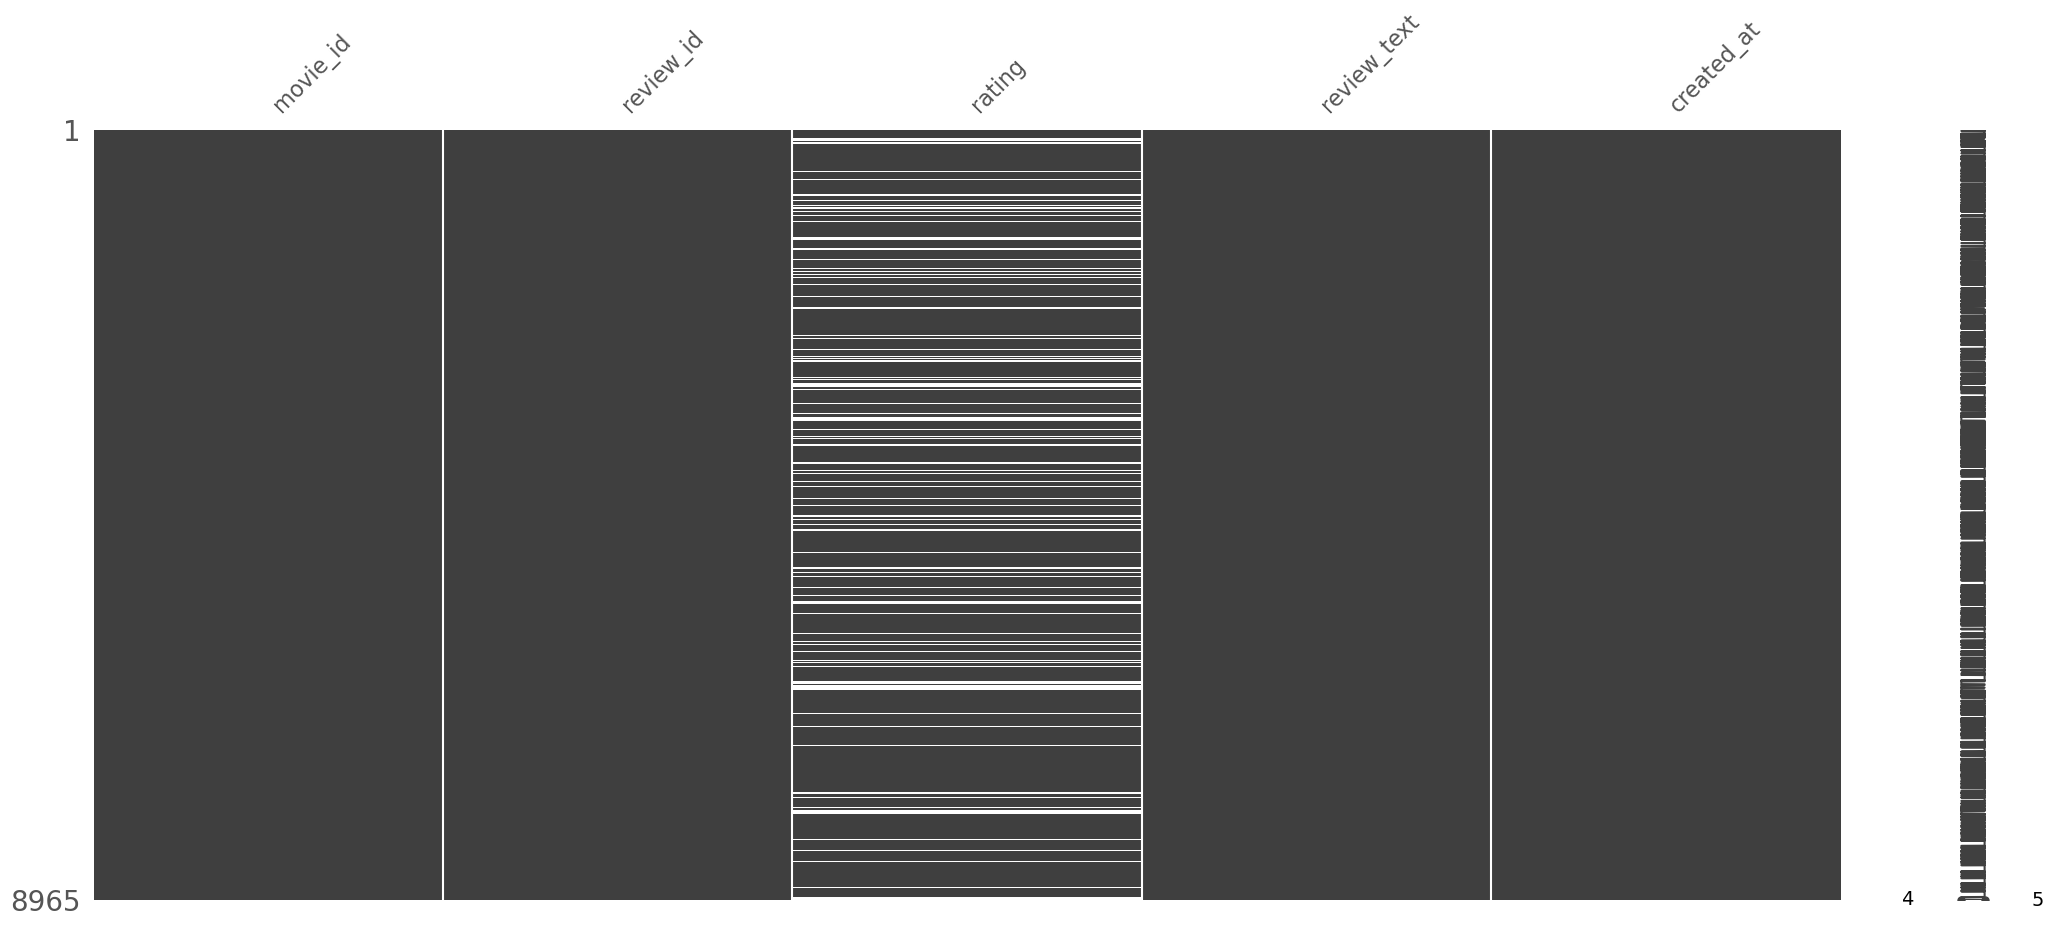

In [52]:
import missingno
missingno.matrix(df)

In [53]:
df.duplicated('review_text').sum()

4

In [54]:
# Dropna and rename columns
df = df.dropna(subset=['review_text'])
df = df.rename({'author_rating':'rating'},axis=1)
df

,movie_id,review_id,rating,review_text,created_at
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517000+00:00
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832000+00:00
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310000+00:00
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033000+00:00
4,10012,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244000+00:00
...,...,...,...,...,...
8960,99861,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630000+00:00
8961,99861,5ef819bba284eb00398dc810,7.0,Third viewing of this and while not the strong...,2020-06-28 04:16:59.341000+00:00
8962,99861,600616349a358d0040c2ecad,7.0,"Cool seeing them all together again, even if I...",2021-01-18 23:13:56.078000+00:00
8963,9988,5a6940bc9251414a2e009179,5.0,"Not one of Broken Lizard's strongest entries, ...",2018-01-25 02:28:12.494000+00:00


### Removing HTML/HTTPS (Orig From Notebook 6B)

In [55]:
df['review_text_raw'] = df['review_text'].copy()
df

,movie_id,review_id,rating,review_text,created_at,review_text_raw
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517000+00:00,Better then the original I think. Was pretty f...
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832000+00:00,Kind of boring. It's a good plot and storyline...
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310000+00:00,"Heartwarming, if not as impactful as it intend..."
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033000+00:00,"""Kenai"" is a young Inuit warrior who disturbs ..."
4,10012,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244000+00:00,Seems like an apt title for everything that ha...
...,...,...,...,...,...,...
8960,99861,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630000+00:00,It's just what I feared. Marvel has gotten so ...
8961,99861,5ef819bba284eb00398dc810,7.0,Third viewing of this and while not the strong...,2020-06-28 04:16:59.341000+00:00,Third viewing of this and while not the strong...
8962,99861,600616349a358d0040c2ecad,7.0,"Cool seeing them all together again, even if I...",2021-01-18 23:13:56.078000+00:00,"Cool seeing them all together again, even if I..."
8963,9988,5a6940bc9251414a2e009179,5.0,"Not one of Broken Lizard's strongest entries, ...",2018-01-25 02:28:12.494000+00:00,"Not one of Broken Lizard's strongest entries, ..."


In [56]:
# Checking for links
df.loc[df['review_text'].str.contains('http')]


,movie_id,review_id,rating,review_text,created_at,review_text_raw
32,1008042,64c05242df86a800e77f984d,8.0,_Talk to Me_ is a brilliant and spine tingling...,2023-07-25 22:52:50.439000+00:00,_Talk to Me_ is a brilliant and spine tingling...
134,1020006,656ce4b88ee0a900ae84b97e,6.0,FULL SPOILER-FREE REVIEW @ https://www.msbrevi...,2023-12-03 20:27:36.869000+00:00,FULL SPOILER-FREE REVIEW @ https://www.msbrevi...
135,1020006,65974320726fb171a0ab22c4,6.0,"Just rather uninteresting, on film terms at le...",2024-01-04 23:45:36.053000+00:00,"Just rather uninteresting, on film terms at le..."
139,1022796,6576df5e7a3c52010cde5f6e,7.0,FULL SPOILER-FREE REVIEW @ https://www.firstsh...,2023-12-11 10:07:26.814000+00:00,FULL SPOILER-FREE REVIEW @ https://www.firstsh...
259,1071215,655803f10816c7011a0d10e9,4.0,There is a void to fill regarding a yearly _Th...,2023-11-18 00:23:13.374000+00:00,There is a void to fill regarding a yearly _Th...
...,...,...,...,...,...,...
8797,9722,62dc0acdc998260440dd8ebb,4.0,"Jack Wyatt (Will Ferrell), a Hollywood star re...",2022-07-23 14:50:53.377000+00:00,"Jack Wyatt (Will Ferrell), a Hollywood star re..."
8821,976573,64b8fbdb3009aa013967a867,8.0,FULL SPOILER-FREE REVIEW @ https://www.firstsh...,2023-07-20 09:18:19.199000+00:00,FULL SPOILER-FREE REVIEW @ https://www.firstsh...
8824,976584,65294309ea84c7010c1af5ab,7.0,FULL SPOILER-FREE REVIEW @ https://fandomwire....,2023-10-13 13:15:53.147000+00:00,FULL SPOILER-FREE REVIEW @ https://fandomwire....
8855,980489,64e650d9c3c89100aed82433,8.0,FULL SPOILER-FREE REVIEW @ https://www.firstsh...,2023-08-23 18:32:57.943000+00:00,FULL SPOILER-FREE REVIEW @ https://www.firstsh...


In [57]:
# Checking for raw html
df.loc[df['review_text'].str.contains('<')]

,movie_id,review_id,rating,review_text,created_at,review_text_raw
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310000+00:00,"Heartwarming, if not as impactful as it intend..."
18,100402,6004c3c97f6c8d003d747950,8.0,Entertaining!\r\n\r\n<em>'Captain America: The...,2021-01-17 23:10:01.623000+00:00,Entertaining!\r\n\r\n<em>'Captain America: The...
28,10067,5fa3ff82c68b69003d9e1bb6,5.0,The most absurd thing about this is that Akon ...,2020-11-05 13:34:58.334000+00:00,The most absurd thing about this is that Akon ...
56,10138,600234dc2f7915003e99efc3,7.0,"<em>'Iron Man 2'</em> is good, nothing special...",2021-01-16 00:35:40.244000+00:00,"<em>'Iron Man 2'</em> is good, nothing special..."
64,10140,5fa2c2236782590035a0d722,6.0,"I wouldn't class this as a good or bad film, i...",2020-11-04 15:00:51.184000+00:00,"I wouldn't class this as a good or bad film, i..."
...,...,...,...,...,...,...
8902,9904,5f2ee202cdf2e600391dd79d,5.0,Very poor.\r\n\r\nI couldn't tell you one thin...,2020-08-08 17:33:54.764000+00:00,Very poor.\r\n\r\nI couldn't tell you one thin...
8920,9969,5fdd583a4a4bf6003f87d8af,7.0,"Stupid, whacky and bonkers... yet enjoyable. I...",2020-12-19 01:32:42.942000+00:00,"Stupid, whacky and bonkers... yet enjoyable. I..."
8922,9982,5f2acfc14b6d9d00368379c8,7.0,Harmless fun. <em>'Chicken Little'</em> isn't ...,2020-08-05 15:26:57.552000+00:00,Harmless fun. <em>'Chicken Little'</em> isn't ...
8923,9986,58ebb44c925141351f04e15b,9.0,This is a lovely film :) Julia Roberts is love...,2017-04-10 16:35:24.892000+00:00,This is a lovely film :) Julia Roberts is love...


### Remove HTML Tags

In [58]:
import re

# Regular expression to match HTML tags
regex_html = r"<[^>]*>"

# Apply the regex to the DataFrame column using str.replace
df['review_text'] = df['review_text'].str.replace(regex_html, '', regex=True)
df

,movie_id,review_id,rating,review_text,created_at,review_text_raw
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517000+00:00,Better then the original I think. Was pretty f...
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832000+00:00,Kind of boring. It's a good plot and storyline...
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310000+00:00,"Heartwarming, if not as impactful as it intend..."
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033000+00:00,"""Kenai"" is a young Inuit warrior who disturbs ..."
4,10012,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244000+00:00,Seems like an apt title for everything that ha...
...,...,...,...,...,...,...
8960,99861,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630000+00:00,It's just what I feared. Marvel has gotten so ...
8961,99861,5ef819bba284eb00398dc810,7.0,Third viewing of this and while not the strong...,2020-06-28 04:16:59.341000+00:00,Third viewing of this and while not the strong...
8962,99861,600616349a358d0040c2ecad,7.0,"Cool seeing them all together again, even if I...",2021-01-18 23:13:56.078000+00:00,"Cool seeing them all together again, even if I..."
8963,9988,5a6940bc9251414a2e009179,5.0,"Not one of Broken Lizard's strongest entries, ...",2018-01-25 02:28:12.494000+00:00,"Not one of Broken Lizard's strongest entries, ..."


In [59]:
# Compare original with cleaned
compare_cols = ['review_text_raw','review_text']

pd.set_option('display.max_colwidth',250)

In [60]:
df.loc[df['review_text_raw'].str.contains('<'), compare_cols]

,review_text_raw,review_text
2,"Heartwarming, if not as impactful as it intends to be.\r\n\r\n<em>'Brother Bear'</em> leaves heartfelt feelings and features a cute story. It does get a bit too melancholic in moments where it doesn't need to be or where it's not set up perfectly...","Heartwarming, if not as impactful as it intends to be.\r\n\r\n'Brother Bear' leaves heartfelt feelings and features a cute story. It does get a bit too melancholic in moments where it doesn't need to be or where it's not set up perfectly. It can ..."
18,"Entertaining!\r\n\r\n<em>'Captain America: The Winter Soldier'</em> makes for an enjoyable flick. Chris Evans does great work as the lead character, while Scarlett Johansson gives her most fun to watch performance in the MCU up until this point; ...","Entertaining!\r\n\r\n'Captain America: The Winter Soldier' makes for an enjoyable flick. Chris Evans does great work as the lead character, while Scarlett Johansson gives her most fun to watch performance in the MCU up until this point; it would'..."
28,"The most absurd thing about this is that Akon did a song for it.\r\n\r\nThis 2006 remake of 1959's <em>'The Shaggy Dog'</em> is very bad. That's thanks to some lazy writing and humour, none of the jokes land while the plot - while I praise them f...","The most absurd thing about this is that Akon did a song for it.\r\n\r\nThis 2006 remake of 1959's 'The Shaggy Dog' is very bad. That's thanks to some lazy writing and humour, none of the jokes land while the plot - while I praise them for changi..."
56,"<em>'Iron Man 2'</em> is good, nothing special, but good.\r\n\r\nRobert Downey Jr. is just as entertaining in the lead role, while the specials efforts are again pleasing. The score, which I found slightly lacking in <em>'Iron Man'</em>, is impro...","'Iron Man 2' is good, nothing special, but good.\r\n\r\nRobert Downey Jr. is just as entertaining in the lead role, while the specials efforts are again pleasing. The score, which I found slightly lacking in 'Iron Man', is improved. The plot isn'..."
64,"I wouldn't class this as a good or bad film, it's in a weird sorta in-between to me.\r\n\r\n<em>'The Chronicles of Narnia: The Voyage of the Dawn Treader'</em> is, comparatively, bad. It loses the vibe and all the intrigue that the first film has...","I wouldn't class this as a good or bad film, it's in a weird sorta in-between to me.\r\n\r\n'The Chronicles of Narnia: The Voyage of the Dawn Treader' is, comparatively, bad. It loses the vibe and all the intrigue that the first film has, as it c..."
...,...,...
8902,"Very poor.\r\n\r\nI couldn't tell you one thing I enjoyed about this. To be ultra fair, there isn't anything truly diabolical about it either - hence the (generous?) rating. It's just so basic and limp that it struggles to entertain at all, I'd e...","Very poor.\r\n\r\nI couldn't tell you one thing I enjoyed about this. To be ultra fair, there isn't anything truly diabolical about it either - hence the (generous?) rating. It's just so basic and limp that it struggles to entertain at all, I'd e..."
8920,"Stupid, whacky and bonkers... yet enjoyable. I found <em>'Deck the Halls'</em> fun.\r\n\r\nDanny DeVito is the film's star, no question. If it wasn't for him I'd potentially be rating this lower, I admit. He gives an amusing performance, while th...","Stupid, whacky and bonkers... yet enjoyable. I found 'Deck the Halls' fun.\r\n\r\nDanny DeVito is the film's star, no question. If it wasn't for him I'd potentially be rating this lower, I admit. He gives an amusing performance, while the hearty ..."
8922,"Harmless fun. <em>'Chicken Little'</em> isn't anything standout, but there is solid humour and a satisfactory premise to follow.\r\n\r\nI like the references to pop culture, Zach Braff is enjoyable in the titular role and the run time is nice and...","Harmless fun. 'Chicken Little' isn't anything standout, but there is solid humour and a satisfactory premise to follow.\r\n\r\nI like the references 

### Replace Links with `[LINK]`

In [61]:
regex_url = "https?:\/\/(?:www\.)?[^\s]+"
df.loc[df['review_text'].str.contains(regex_url), compare_cols]

,review_text_raw,review_text
32,_Talk to Me_ is a brilliant and spine tingling evolution of _The Monkey’s Paw_ short story with an incredibly satisfying ending and a scene stealing performance from Sophie Wilde. Aaron McLisky’s cinematography featuring a ghoulish incline at jus...,_Talk to Me_ is a brilliant and spine tingling evolution of _The Monkey’s Paw_ short story with an incredibly satisfying ending and a scene stealing performance from Sophie Wilde. Aaron McLisky’s cinematography featuring a ghoulish incline at jus...
134,"FULL SPOILER-FREE REVIEW @ https://www.msbreviews.com/movie-reviews/priscilla-mini-review\r\n\r\n""Priscilla navigates the familiar territory of biographical storytelling, offering a nuanced exploration of Priscilla Presley's life.\r\n\r\nCailee S...","FULL SPOILER-FREE REVIEW @ https://www.msbreviews.com/movie-reviews/priscilla-mini-review\r\n\r\n""Priscilla navigates the familiar territory of biographical storytelling, offering a nuanced exploration of Priscilla Presley's life.\r\n\r\nCailee S..."
139,"FULL SPOILER-FREE REVIEW @ https://www.firstshowing.net/2023/review-disney-animations-wish-ariana-debose/\r\n\r\n""Wish is a magical journey about the vitality of personal wishes and the importance of pursuing those same dreams. Although the narra...","FULL SPOILER-FREE REVIEW @ https://www.firstshowing.net/2023/review-disney-animations-wish-ariana-debose/\r\n\r\n""Wish is a magical journey about the vitality of personal wishes and the importance of pursuing those same dreams. Although the narra..."
259,There is a void to fill regarding a yearly _Thanksgiving_ franchise. The Carver is outrageous enough to be more enjoyable if Eli Roth allows other directors to play in his grotesque cornbread-stuffing-filled sandbox in future installments. As a s...,There is a void to fill regarding a yearly _Thanksgiving_ franchise. The Carver is outrageous enough to be more enjoyable if Eli Roth allows other directors to play in his grotesque cornbread-stuffing-filled sandbox in future installments. As a s...
272,"FULL SPOILER-FREE REVIEW @ https://fandomwire.com/night-swim-review-yet-another-forgettable-january-horror-flick/\r\n\r\n""Night Swim fails to rise above the limitations of its generic horror foundation.\r\n\r\nDespite commendable performances fro...","FULL SPOILER-FREE REVIEW @ https://fandomwire.com/night-swim-review-yet-another-forgettable-january-horror-flick/\r\n\r\n""Night Swim fails to rise above the limitations of its generic horror foundation.\r\n\r\nDespite commendable performances fro..."
...,...,...
8797,"Jack Wyatt (Will Ferrell), a Hollywood star recovering from a couple of box office bombs, is talked into starring in a reboot of the 1964 television series, Bewitched. Desperate to regain his fame, he insists on hiring an unknown actress to play ...","Jack Wyatt (Will Ferrell), a Hollywood star recovering from a couple of box office bombs, is talked into starring in a reboot of the 1964 television series, Bewitched. Desperate to regain his fame, he insists on hiring an unknown actress to play ..."
8821,"FULL SPOILER-FREE REVIEW @ https://www.firstshowing.net/2023/review-elemental-is-a-thematically-rich-inter-element-love-story/\r\n\r\n""Pixar's Elemental may be straightforward and predictable, but it's so thematically rich and features such emoti...","FULL SPOILER-FREE REVIEW @ https://www.firstshowing.net/2023/review-elemental-is-a-thematically-rich-inter-element-love-story/\r\n\r\n""Pixar's Elemental may be straightforward and predictable, but it's so thematically rich and features such emoti..."
8824,"FULL SPOILER-FREE REVIEW @ https://fandomwire.com/the-book-of-clarence-bfi-london-film-festival-review-hilarious-thought-provoking-biblical-satire/\r\n\r\n""The Book of Clarence certifies Jeymes Samuel as a do-it-all in filmmaking. Whether through...","FULL SPOILER-FREE REVIEW @ https://fandomwire.com/the-book-of-clarence-bfi-london-film-festival-review-hilarious-thought-provoking-biblical-sat

In [62]:
df['review_text'] = df['review_text'].str.replace(regex_url, '[LINK]', regex=True)
df

,movie_id,review_id,rating,review_text,created_at,review_text_raw
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty funny. I thought the comedy was better then the original too.,2023-07-04 04:01:35.517000+00:00,Better then the original I think. Was pretty funny. I thought the comedy was better then the original too.
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline. Nothing really to keep you interested.,2023-04-17 13:07:18.832000+00:00,Kind of boring. It's a good plot and storyline. Nothing really to keep you interested.
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intends to be.\r\n\r\n'Brother Bear' leaves heartfelt feelings and features a cute story. It does get a bit too melancholic in moments where it doesn't need to be or where it's not set up perfectly. It can ...",2020-07-30 12:29:31.310000+00:00,"Heartwarming, if not as impactful as it intends to be.\r\n\r\n<em>'Brother Bear'</em> leaves heartfelt feelings and features a cute story. It does get a bit too melancholic in moments where it doesn't need to be or where it's not set up perfectly..."
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs the spirits when he kills a bear. His punishment is to be turned into one himself, and be left to wander the wilderness alone. Luckily, he encounters the young cub ""Koda"" who thinks he might know the ...",2024-01-01 08:10:10.033000+00:00,"""Kenai"" is a young Inuit warrior who disturbs the spirits when he kills a bear. His punishment is to be turned into one himself, and be left to wander the wilderness alone. Luckily, he encounters the young cub ""Koda"" who thinks he might know the ..."
4,10012,628159c8caa50850dcf93d33,5.0,"Seems like an apt title for everything that happened behind the scenes. If not for Justice League (which cost $250M+), this might be the poster child of what happens when a studio messes around with a project. Honestly I really hope one day we ge...",2022-05-15 19:51:36.244000+00:00,"Seems like an apt title for everything that happened behind the scenes. If not for Justice League (which cost $250M+), this might be the poster child of what happens when a studio messes around with a project. Honestly I really hope one day we ge..."
...,...,...,...,...,...,...
8960,99861,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so caught up in making sure that each character gets some action time that there's no room now for character development. They need to tone it down a bit.,2020-01-16 22:08:28.630000+00:00,It's just what I feared. Marvel has gotten so caught up in making sure that each character gets some action time that there's no room now for character development. They need to tone it down a bit.
8961,99861,5ef819bba284eb00398dc810,7.0,"Third viewing of this and while not the strongest within the MCU, or of the other Avenger movies, still has some good parts (introduction to Elizabeth Olsen's Scarlet Witch and Paul Bettany's Vision; further setting into motion the infinity stone...",2020-06-28 04:16:59.341000+00:00,"Third viewing of this and while not the strongest within the MCU, or of the other Avenger movies, still has some good parts (introduction to Elizabeth Olsen's Scarlet Witch and Paul Bettany's Vision; further setting into motion the infinity stone..."
8962,99861,600616349a358d0040c2ecad,7.0,"Cool seeing them all together again, even if I didn't massively enjoy it. It's good, nothing more or less in my opinion.\r\n\r\n'Avengers: Age of Ultron' isn't too far off 2012's 'The Avengers', especially in terms of how I fell about it. I defin...",2021-01-18 23:13:56.078000+00:00,"Cool seeing them all together again, even if I didn't massively enjoy it. It's good, nothing more or less in my opinion.\r\n\r\n<em>'Avengers: Age of Ultron'</em> isn't too far off 2012's <em>'The Avengers'</em>, especially in terms of how I fell..."
8963,9988,5a6940bc925141

In [63]:
df.loc[df['review_text_raw'].str.contains('http'), compare_cols]

,review_text_raw,review_text
32,_Talk to Me_ is a brilliant and spine tingling evolution of _The Monkey’s Paw_ short story with an incredibly satisfying ending and a scene stealing performance from Sophie Wilde. Aaron McLisky’s cinematography featuring a ghoulish incline at jus...,_Talk to Me_ is a brilliant and spine tingling evolution of _The Monkey’s Paw_ short story with an incredibly satisfying ending and a scene stealing performance from Sophie Wilde. Aaron McLisky’s cinematography featuring a ghoulish incline at jus...
134,"FULL SPOILER-FREE REVIEW @ https://www.msbreviews.com/movie-reviews/priscilla-mini-review\r\n\r\n""Priscilla navigates the familiar territory of biographical storytelling, offering a nuanced exploration of Priscilla Presley's life.\r\n\r\nCailee S...","FULL SPOILER-FREE REVIEW @ [LINK]\r\n\r\n""Priscilla navigates the familiar territory of biographical storytelling, offering a nuanced exploration of Priscilla Presley's life.\r\n\r\nCailee Spaeny's career-best performance skillfully delves into t..."
135,"Just rather uninteresting, on film terms at least.\r\n\r\nIt <em>is</em> interesting seeing the film portray a different type of version of Elvis Presley, one that is uncomfortable to watch unfold but one that ought to be told. That's where anyth...","Just rather uninteresting, on film terms at least.\r\n\r\nIt is interesting seeing the film portray a different type of version of Elvis Presley, one that is uncomfortable to watch unfold but one that ought to be told. That's where anything notew..."
139,"FULL SPOILER-FREE REVIEW @ https://www.firstshowing.net/2023/review-disney-animations-wish-ariana-debose/\r\n\r\n""Wish is a magical journey about the vitality of personal wishes and the importance of pursuing those same dreams. Although the narra...","FULL SPOILER-FREE REVIEW @ [LINK]\r\n\r\n""Wish is a magical journey about the vitality of personal wishes and the importance of pursuing those same dreams. Although the narrative follows a familiar structure and doesn't delve beyond the central t..."
259,There is a void to fill regarding a yearly _Thanksgiving_ franchise. The Carver is outrageous enough to be more enjoyable if Eli Roth allows other directors to play in his grotesque cornbread-stuffing-filled sandbox in future installments. As a s...,There is a void to fill regarding a yearly _Thanksgiving_ franchise. The Carver is outrageous enough to be more enjoyable if Eli Roth allows other directors to play in his grotesque cornbread-stuffing-filled sandbox in future installments. As a s...
...,...,...
8797,"Jack Wyatt (Will Ferrell), a Hollywood star recovering from a couple of box office bombs, is talked into starring in a reboot of the 1964 television series, Bewitched. Desperate to regain his fame, he insists on hiring an unknown actress to play ...","Jack Wyatt (Will Ferrell), a Hollywood star recovering from a couple of box office bombs, is talked into starring in a reboot of the 1964 television series, Bewitched. Desperate to regain his fame, he insists on hiring an unknown actress to play ..."
8821,"FULL SPOILER-FREE REVIEW @ https://www.firstshowing.net/2023/review-elemental-is-a-thematically-rich-inter-element-love-story/\r\n\r\n""Pixar's Elemental may be straightforward and predictable, but it's so thematically rich and features such emoti...","FULL SPOILER-FREE REVIEW @ [LINK]\r\n\r\n""Pixar's Elemental may be straightforward and predictable, but it's so thematically rich and features such emotionally relatable characters that, by the end, I found myself fighting back tears. It features..."
8824,"FULL SPOILER-FREE REVIEW @ https://fandomwire.com/the-book-of-clarence-bfi-london-film-festival-review-hilarious-thought-provoking-biblical-satire/\r\n\r\n""The Book of Clarence certifies Jeymes Samuel as a do-it-all in filmmaking. Whether through...","FULL SPOILER-FREE REVIEW @ [LINK]\r\n\r\n""The Book of Clarence certifies Jeymes Samuel as a do-it-all in filmmaking. Whether through his stylize

## Part 2) Spacy Preprocessing for EDA

In [64]:
# combined_reviews_fname = FPATHS['data']['raw']['movie-reviews']
# reviews.to_csv(combined_reviews_fname, index=False, compression='gzip')

In [65]:
# del reviews

**1) Data Preprocessing:**

- Load and inspect the dataset.
    - How many reviews?
    - What does the distribution of ratings look like?
    - Any null values?



- Use the rating column to create a new target column with two groups: high-rating and low-rating groups.
    - We recommend defining "High-rating" reviews as any review with a rating >=9; and "Low-rating" reviews as any review with a rating <=4. The middle ratings between 4 and 9 will be excluded from the analysis.
    - You may use an alternative definition for High and Low reviews, but justify your choice in your notebook/README.



- Utilize NLTK and SpaCy for basic text processing, including:

    - removing stopwords
    - tokenization
    - lemmatization
    - Tips:
        - Be sure to create a custom nlp object and disable the named entity recognizer. Otherwise, processing will take a very long time!
        - **You will want to create several versions of the data, lemmatized, tokenized, lemmatized, and joined back to one string per review, and tokenized and joined back to one string per review.** This will be useful for different analysis and modeling techniques.

    

- Save your processed data frame in a **joblib** file saved in the "Data-NLP/" folder for future modeling.

    

In [66]:
# import spacy
# # Disable parser and ner
# nlp_light = spacy.load("en_core_web_sm", disable=['parser','ner'])
# # Print active components
# nlp_light.pipe_names

In [67]:
import spacy
# Custom NLP Object
nlp_custom = ds.nlp.make_custom_nlp(disable=['ner'],#'parser'],
                                contractions=[],
                            stopwords_to_add=["★"])
nlp_custom

> Changed review_text column to remove HTML and URLs as of 01/22/24

In [68]:
%%time
print(f"- Running full spacy preprocessing code (this will take several minutes).")
df = df.copy()
df["tokens-dirty"] = ds.nlp.batch_preprocess_texts(
    df["review_text"],
    remove_stopwords=False,
    remove_punct=True,
    use_lemmas=False,
    nlp=nlp_custom,
)
df["tokens"] = ds.nlp.batch_preprocess_texts(
    df["review_text"],
    remove_stopwords=True,
    remove_punct=True,
    use_lemmas=False,
    nlp=nlp_custom,
)
df["lemmas"] = ds.nlp.batch_preprocess_texts(
    df["review_text"],
    remove_stopwords=True,
    remove_punct=True,
    use_lemmas=True,
    nlp=nlp_custom,
)

## Make string versions of processed text
df["tokens-dirty-joined"] = df["tokens-dirty"].map(lambda x: " ".join(x))
df["tokens-joined"] = df["tokens"].map(lambda x: " ".join(x))
df["lemmas-joined"] = df["lemmas"].map(lambda x: " ".join(x))

df.head()

- Running full spacy preprocessing code (this will take several minutes).


8965it [00:58, 153.52it/s]
8965it [00:57, 156.01it/s]
8965it [00:57, 156.91it/s]


CPU times: user 36.7 s, sys: 8.03 s, total: 44.8 s
Wall time: 2min 53s


,movie_id,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty funny. I thought the comedy was better then the original too.,2023-07-04 04:01:35.517000+00:00,Better then the original I think. Was pretty funny. I thought the comedy was better then the original too.,"[better, then, the, original, i, think, was, pretty, funny, i, thought, the, comedy, was, better, then, the, original, too]","[better, original, think, pretty, funny, thought, comedy, better, original]","[well, original, think, pretty, funny, think, comedy, well, original]",better then the original i think was pretty funny i thought the comedy was better then the original too,better original think pretty funny thought comedy better original,well original think pretty funny think comedy well original
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline. Nothing really to keep you interested.,2023-04-17 13:07:18.832000+00:00,Kind of boring. It's a good plot and storyline. Nothing really to keep you interested.,"[kind, of, boring, it, 's, a, good, plot, and, storyline, nothing, really, to, keep, you, interested]","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline nothing really to keep you interested,kind boring good plot storyline interested,kind boring good plot storyline interested
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intends to be.\r\n\r\n'Brother Bear' leaves heartfelt feelings and features a cute story. It does get a bit too melancholic in moments where it doesn't need to be or where it's not set up perfectly. It can ...",2020-07-30 12:29:31.310000+00:00,"Heartwarming, if not as impactful as it intends to be.\r\n\r\n<em>'Brother Bear'</em> leaves heartfelt feelings and features a cute story. It does get a bit too melancholic in moments where it doesn't need to be or where it's not set up perfectly...","[heartwarming, if, not, as, impactful, as, it, intends, to, be, brother, bear, leaves, heartfelt, feelings, and, features, a, cute, story, it, does, get, a, bit, too, melancholic, in, moments, where, it, does, n't, need, to, be, or, where, it, 's...","[heartwarming, impactful, intends, brother, bear, leaves, heartfelt, feelings, features, cute, story, bit, melancholic, moments, need, set, perfectly, feel, little, predictable, twist, decent, animation, wise, fine, early, aspect, ratio, stuff, o...","[heartwarme, impactful, intend, brother, bear, leave, heartfelt, feeling, feature, cute, story, bit, melancholic, moment, need, set, perfectly, feel, little, predictable, twist, decent, animation, wise, fine, early, aspect, ratio, stuff, oddly, v...",heartwarming if not as impactful as it intends to be brother bear leaves heartfelt feelings and features a cute story it does get a bit too melancholic in moments where it does n't need to be or where it 's not set up perfectly it can also feel a...,heartwarming impactful intends brother bear leaves heartfelt feelings features cute story bit melancholic moments need set perfectly feel little predictable twist decent animation wise fine early aspect ratio stuff oddly voice cast amazing despit...,heartwarme impactful intend brother bear leave heartfelt feeling feature cute story bit melancholic moment need set perfectly feel little predictable twist decent animation wise fine early aspect ratio stuff oddly voice cast amazing despite talen...
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs the spirits when he kills a bear. His punishment is to be turned into one himself, and be left to wander the wilderness alone. Luckily, he encounters the young cub ""Koda"" who thinks he might know the ...",2024-01-01 08:10:10.033000+00:00,"""Kenai"" is a young Inuit warrior who

## Save Preprocessed Reviews

### Saving a JSON file

In [69]:
# df = df.set_index("review_id")#, errors='ignore')
# df

In [70]:
df

,movie_id,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty funny. I thought the comedy was better then the original too.,2023-07-04 04:01:35.517000+00:00,Better then the original I think. Was pretty funny. I thought the comedy was better then the original too.,"[better, then, the, original, i, think, was, pretty, funny, i, thought, the, comedy, was, better, then, the, original, too]","[better, original, think, pretty, funny, thought, comedy, better, original]","[well, original, think, pretty, funny, think, comedy, well, original]",better then the original i think was pretty funny i thought the comedy was better then the original too,better original think pretty funny thought comedy better original,well original think pretty funny think comedy well original
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline. Nothing really to keep you interested.,2023-04-17 13:07:18.832000+00:00,Kind of boring. It's a good plot and storyline. Nothing really to keep you interested.,"[kind, of, boring, it, 's, a, good, plot, and, storyline, nothing, really, to, keep, you, interested]","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline nothing really to keep you interested,kind boring good plot storyline interested,kind boring good plot storyline interested
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intends to be.\r\n\r\n'Brother Bear' leaves heartfelt feelings and features a cute story. It does get a bit too melancholic in moments where it doesn't need to be or where it's not set up perfectly. It can ...",2020-07-30 12:29:31.310000+00:00,"Heartwarming, if not as impactful as it intends to be.\r\n\r\n<em>'Brother Bear'</em> leaves heartfelt feelings and features a cute story. It does get a bit too melancholic in moments where it doesn't need to be or where it's not set up perfectly...","[heartwarming, if, not, as, impactful, as, it, intends, to, be, brother, bear, leaves, heartfelt, feelings, and, features, a, cute, story, it, does, get, a, bit, too, melancholic, in, moments, where, it, does, n't, need, to, be, or, where, it, 's...","[heartwarming, impactful, intends, brother, bear, leaves, heartfelt, feelings, features, cute, story, bit, melancholic, moments, need, set, perfectly, feel, little, predictable, twist, decent, animation, wise, fine, early, aspect, ratio, stuff, o...","[heartwarme, impactful, intend, brother, bear, leave, heartfelt, feeling, feature, cute, story, bit, melancholic, moment, need, set, perfectly, feel, little, predictable, twist, decent, animation, wise, fine, early, aspect, ratio, stuff, oddly, v...",heartwarming if not as impactful as it intends to be brother bear leaves heartfelt feelings and features a cute story it does get a bit too melancholic in moments where it does n't need to be or where it 's not set up perfectly it can also feel a...,heartwarming impactful intends brother bear leaves heartfelt feelings features cute story bit melancholic moments need set perfectly feel little predictable twist decent animation wise fine early aspect ratio stuff oddly voice cast amazing despit...,heartwarme impactful intend brother bear leave heartfelt feeling feature cute story bit melancholic moment need set perfectly feel little predictable twist decent animation wise fine early aspect ratio stuff oddly voice cast amazing despite talen...
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs the spirits when he kills a bear. His punishment is to be turned into one himself, and be left to wander the wilderness alone. Luckily, he encounters the young cub ""Koda"" who thinks he might know the ...",2024-01-01 08:10:10.033000+00:00,"""Kenai"" is a young Inuit warrior who

In [71]:
# fpath_json = "Data-NLP/processed-nlp-data.json"
fpath_json = FPATHS['data']['raw']['processed-json']
fpath_json

'Data-NLP/processed-nlp-data.json'

In [72]:
df.head(2).to_json(orient='index')

'{"0":{"movie_id":100042,"review_id":"64a3999fe9da6900c763aa8d","rating":7.0,"review_text":"Better then the original I think. Was pretty funny. I thought the comedy was better then the original too.","created_at":"2023-07-04 04:01:35.517000+00:00","review_text_raw":"Better then the original I think. Was pretty funny. I thought the comedy was better then the original too.","tokens-dirty":["better","then","the","original","i","think","was","pretty","funny","i","thought","the","comedy","was","better","then","the","original","too"],"tokens":["better","original","think","pretty","funny","thought","comedy","better","original"],"lemmas":["well","original","think","pretty","funny","think","comedy","well","original"],"tokens-dirty-joined":"better then the original i think was pretty funny i thought the comedy was better then the original too","tokens-joined":"better original think pretty funny thought comedy better original","lemmas-joined":"well original think pretty funny think comedy well or

In [73]:
# Save to json
df.to_json(fpath_json)

In [74]:
temp_df = pd.read_json(fpath_json)#.reset_index(drop=False)
temp_df

,movie_id,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty funny. I thought the comedy was better then the original too.,2023-07-04 04:01:35.517000+00:00,Better then the original I think. Was pretty funny. I thought the comedy was better then the original too.,"[better, then, the, original, i, think, was, pretty, funny, i, thought, the, comedy, was, better, then, the, original, too]","[better, original, think, pretty, funny, thought, comedy, better, original]","[well, original, think, pretty, funny, think, comedy, well, original]",better then the original i think was pretty funny i thought the comedy was better then the original too,better original think pretty funny thought comedy better original,well original think pretty funny think comedy well original
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline. Nothing really to keep you interested.,2023-04-17 13:07:18.832000+00:00,Kind of boring. It's a good plot and storyline. Nothing really to keep you interested.,"[kind, of, boring, it, 's, a, good, plot, and, storyline, nothing, really, to, keep, you, interested]","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline nothing really to keep you interested,kind boring good plot storyline interested,kind boring good plot storyline interested
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intends to be.\r\n\r\n'Brother Bear' leaves heartfelt feelings and features a cute story. It does get a bit too melancholic in moments where it doesn't need to be or where it's not set up perfectly. It can ...",2020-07-30 12:29:31.310000+00:00,"Heartwarming, if not as impactful as it intends to be.\r\n\r\n<em>'Brother Bear'</em> leaves heartfelt feelings and features a cute story. It does get a bit too melancholic in moments where it doesn't need to be or where it's not set up perfectly...","[heartwarming, if, not, as, impactful, as, it, intends, to, be, brother, bear, leaves, heartfelt, feelings, and, features, a, cute, story, it, does, get, a, bit, too, melancholic, in, moments, where, it, does, n't, need, to, be, or, where, it, 's...","[heartwarming, impactful, intends, brother, bear, leaves, heartfelt, feelings, features, cute, story, bit, melancholic, moments, need, set, perfectly, feel, little, predictable, twist, decent, animation, wise, fine, early, aspect, ratio, stuff, o...","[heartwarme, impactful, intend, brother, bear, leave, heartfelt, feeling, feature, cute, story, bit, melancholic, moment, need, set, perfectly, feel, little, predictable, twist, decent, animation, wise, fine, early, aspect, ratio, stuff, oddly, v...",heartwarming if not as impactful as it intends to be brother bear leaves heartfelt feelings and features a cute story it does get a bit too melancholic in moments where it does n't need to be or where it 's not set up perfectly it can also feel a...,heartwarming impactful intends brother bear leaves heartfelt feelings features cute story bit melancholic moments need set perfectly feel little predictable twist decent animation wise fine early aspect ratio stuff oddly voice cast amazing despit...,heartwarme impactful intend brother bear leave heartfelt feeling feature cute story bit melancholic moment need set perfectly feel little predictable twist decent animation wise fine early aspect ratio stuff oddly voice cast amazing despite talen...
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs the spirits when he kills a bear. His punishment is to be turned into one himself, and be left to wander the wilderness alone. Luckily, he encounters the young cub ""Koda"" who thinks he might know the ...",2024-01-01 08:10:10.033000+00:00,"""Kenai"" is a young Inuit warrior who

In [75]:
type(temp_df.loc[0, 'tokens'])

list

### Save Joblib

In [76]:
import joblib
fpath = FPATHS['data']['raw']['processed-joblib']
joblib.dump(df, fpath)

['Data-NLP/processed-nlp-data.joblib']

In [77]:
# confirming saved properly
loaded = joblib.load(FPATHS['data']['raw']['processed-joblib'])
loaded.head()

,movie_id,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty funny. I thought the comedy was better then the original too.,2023-07-04 04:01:35.517000+00:00,Better then the original I think. Was pretty funny. I thought the comedy was better then the original too.,"[better, then, the, original, i, think, was, pretty, funny, i, thought, the, comedy, was, better, then, the, original, too]","[better, original, think, pretty, funny, thought, comedy, better, original]","[well, original, think, pretty, funny, think, comedy, well, original]",better then the original i think was pretty funny i thought the comedy was better then the original too,better original think pretty funny thought comedy better original,well original think pretty funny think comedy well original
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline. Nothing really to keep you interested.,2023-04-17 13:07:18.832000+00:00,Kind of boring. It's a good plot and storyline. Nothing really to keep you interested.,"[kind, of, boring, it, 's, a, good, plot, and, storyline, nothing, really, to, keep, you, interested]","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline nothing really to keep you interested,kind boring good plot storyline interested,kind boring good plot storyline interested
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intends to be.\r\n\r\n'Brother Bear' leaves heartfelt feelings and features a cute story. It does get a bit too melancholic in moments where it doesn't need to be or where it's not set up perfectly. It can ...",2020-07-30 12:29:31.310000+00:00,"Heartwarming, if not as impactful as it intends to be.\r\n\r\n<em>'Brother Bear'</em> leaves heartfelt feelings and features a cute story. It does get a bit too melancholic in moments where it doesn't need to be or where it's not set up perfectly...","[heartwarming, if, not, as, impactful, as, it, intends, to, be, brother, bear, leaves, heartfelt, feelings, and, features, a, cute, story, it, does, get, a, bit, too, melancholic, in, moments, where, it, does, n't, need, to, be, or, where, it, 's...","[heartwarming, impactful, intends, brother, bear, leaves, heartfelt, feelings, features, cute, story, bit, melancholic, moments, need, set, perfectly, feel, little, predictable, twist, decent, animation, wise, fine, early, aspect, ratio, stuff, o...","[heartwarme, impactful, intend, brother, bear, leave, heartfelt, feeling, feature, cute, story, bit, melancholic, moment, need, set, perfectly, feel, little, predictable, twist, decent, animation, wise, fine, early, aspect, ratio, stuff, oddly, v...",heartwarming if not as impactful as it intends to be brother bear leaves heartfelt feelings and features a cute story it does get a bit too melancholic in moments where it does n't need to be or where it 's not set up perfectly it can also feel a...,heartwarming impactful intends brother bear leaves heartfelt feelings features cute story bit melancholic moments need set perfectly feel little predictable twist decent animation wise fine early aspect ratio stuff oddly voice cast amazing despit...,heartwarme impactful intend brother bear leave heartfelt feeling feature cute story bit melancholic moment need set perfectly feel little predictable twist decent animation wise fine early aspect ratio stuff oddly voice cast amazing despite talen...
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs the spirits when he kills a bear. His punishment is to be turned into one himself, and be left to wander the wilderness alone. Luckily, he encounters the young cub ""Koda"" who thinks he might know the ...",2024-01-01 08:10:10.033000+00:00,"""Kenai"" is a young Inuit warrior who

# NEW NOTEBOOK: Part 6B - NLP EDA


In [78]:
raise Exception("Split below into new notebook")

Exception: Split below into new notebook

## Load Data

In [ ]:
LOAD_PREVIOUS = False

In [ ]:
# combined_reviews_fname = FPATHS['data']['raw']['movie-reviews']
combined_reviews_fname = 'Data-NLP/combined-tmdb-movie-reviews.csv.gz'

In [ ]:
# fpath = FPATHS['data']['raw']['movie-info']
# movies_df = pd.read_csv(fpath)
# movies_df.head()

In [ ]:
import joblib
if LOAD_PREVIOUS==False:
    print("[i] Loading raw data from csv.\n")
    # fpath = FPATHS['data']['raw']['movie-reviews']
    fpath = combined_reviews_fname
    df = pd.read_csv(fpath)
else:
    print("[i] Loading preprocessed data from joblib.\n")
    fpath = FPATHS['data']['raw']['processed-joblib']
    df=  joblib.load(fpath)
    
df.info()
display(df.head())

In [ ]:
# Check for null values
missingno.matrix(df)
df.isna().sum()

In [ ]:
# Dropping reviews without a rating
df_ml = df.dropna(subset=['rating'])
missingno.matrix(df_ml)

# Predict Ratings

### Define Groups

In [ ]:
sns.histplot(df_ml['rating'])

- "High Rating": >= 9
- "Low Rating": <= 4

In [ ]:
# def set_groups(x):
#     if x >= 7:
#         group = "High"
#     elif x>=5:
#         group="Mid"
#     else:
#         group= "Low'"
#     return group

In [ ]:
def set_group_binary(x):
    if x >= 9:
        group = "High"
    elif x<=4:
        group="Low"
    else:
        group = pd.NA
    return group

In [ ]:
# df_ml = df.copy()
df_ml['target'] = df_ml['rating'].map(set_group_binary)
df_ml['target'].value_counts(dropna=True, normalize=True)

In [ ]:
fig, axes =  plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(data=df_ml, x='rating', hue='target', ax=axes[0])
sns.countplot(data=df_ml, x='target', ax=axes[1])
fig.tight_layout()

### NLP Preprocessing

In [ ]:
THRESH = 1000
df_ml['length'] = df_ml['review_text'].map(lambda x: len(x.split()))
ax = sns.histplot(data=df_ml, x='length')
ax.axvline(THRESH, color='red', ls=':');
ax.set(title='Review Lengths (Whitespace Tokens)')

In [ ]:
# import spacy
# # Disable parser and ner
# nlp_light = spacy.load("en_core_web_sm", disable=['parser','ner'])
# # Print active components
# nlp_light.pipe_names

In [ ]:
import spacy
# Custom NLP Object
nlp_custom = fn.nlp.make_custom_nlp(disable=['ner'],#'parser'],
                                contractions=[],
                            stopwords_to_add=["★"])
nlp_custom

In [ ]:
%%time
if LOAD_PREVIOUS == False:
    print(f"- Running full spacy preprocessing code (this will take several minutes).")
    df = df.copy()
    df["tokens-dirty"] = fn.nlp.batch_preprocess_texts(
        df["review_text"],
        remove_stopwords=False,
        remove_punct=True,
        use_lemmas=False,
        nlp=nlp_custom,
    )
    df["tokens"] = fn.nlp.batch_preprocess_texts(
        df["review_text"],
        remove_stopwords=True,
        remove_punct=True,
        use_lemmas=False,
        nlp=nlp_custom,
    )
    df["lemmas"] = fn.nlp.batch_preprocess_texts(
        df["review_text"],
        remove_stopwords=True,
        remove_punct=True,
        use_lemmas=True,
        nlp=nlp_custom,
    )

    ## Make string versions of processed text
    df["tokens-dirty-joined"] = df["tokens-dirty"].map(lambda x: " ".join(x))
    df["tokens-joined"] = df["tokens"].map(lambda x: " ".join(x))
    df["lemmas-joined"] = df["lemmas"].map(lambda x: " ".join(x))
else:
    print(f"- Skipped preprocessing code (since LOADED_PREVIOUS == True).")
df.head()

- %%time for .map approach:
```
CPU times: user 3min 56s, sys: 7.99 s, total: 4min 4s
Wall time: 4min 6s
```

### Save Joblib

In [ ]:
import joblib
fpath = FPATHS['data']['raw']['processed-joblib']
joblib.dump(df, fpath)

In [ ]:
# confirming saved properly
loaded = joblib.load(FPATHS['data']['raw']['processed-joblib'])
loaded.head()

# Part 2) EDA and Visualization

**2) EDA and Visualization:**

- Create word clouds to visualize the most frequent and significant words in each group.
    - Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)
    - **Save your wordclouds as .png files in the "Images/" folder in your repo.**



- Apply nltk's `FreqDist` class to compare the frequency distribution of words in the review groups.
    - Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)
    - **Save your freq dist plots as .png files in the "Images/" folder in your repo.**



- Perform n-grams analysis (bigrams and trigrams),
    - Remember, you can use this analysis to identify additional custom stop words to use for EDA. (e.g., if the words are common in both groups)
    - Focus on bigrams or trigrams, using NLTK's `BigramCollocationFinder` and BigramAssocMeasures classes (or the Trigram equivalent Finder and Measures) to explore commonly used groups of words for each rating-group.
    - Describe any differences. What do these differences tell you?
    - `Save your...`?



- Perform sentiment analysis to create polarity scores according to VADERS's sentiment lexicon.

    - Compare the sentiments of high-rating and low-rating texts.

    - Compare the average sentiment scores for high and low-rating reviews.

    - Which review polarity scores don't match the ratings? Why do you think this is?

        

**3) Evaluation and Reporting:**

- Based on your analyses, what should someone do (or not do) if they want to make a highly-rated movie?
    - List 3 things associated with high-rating reviews
    - List 3 things associated with low-rating reviews.

> Adding imports as-if standalone notebook

In [ ]:
import matplotlib.pyplot as plt
import missingno
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

import spacy
nlp_custom = fn.nlp.make_custom_nlp(disable=['ner','parser'],contractions=[],
                            stopwords_to_add=["★"])
nlp_custom
# Disable parser and ner
# nlp_light = spacy.load("en_core_web_sm", disable=['parser','ner'])

In [ ]:
import joblib
# fname_data_joblib = "Data/processed-nlp-data.joblib"
fname_data_joblib = FPATHS['data']['raw']['processed-joblib']
df = joblib.load(fname_data_joblib)
df

## Checking for Bad Reviews (HTML)

- There were URLs and html tags in the bigrams/trigrams (PMI).
- Checking for and removing reviews that contain these artificats (if we can afford to drop)

### `ADMIN TO DO`:
>- Discuss with Brenda if should warn students.

In [ ]:
filter_http = df['review_text'].str.contains('http')
filter_http.sum()

In [ ]:
filter_hrefs = df['review_text'].str.contains('href')
filter_hrefs.sum()

In [ ]:
(filter_http | filter_hrefs).sum()

In [ ]:
## Removing reviews with 'href' in review
df = df.loc[~(filter_http | filter_hrefs)]
df

In [ ]:
filter_hrefs = df['review_text'].str.contains('href')
filter_hrefs.sum()

In [ ]:
filter_http = df['review_text'].str.contains('http')
filter_http.sum()

In [ ]:
joblib.dump(df, fname_data_joblib)

## WordClouds

In [ ]:
df['target'].value_counts(1)

In [ ]:
filter_low = df['target'] == "Low"
filter_high = df['target'] == "High"
filter_low.sum(), filter_high.sum()

In [ ]:
high_reviews_text = " ".join( df.loc[filter_high, 'review_text'])
high_reviews_text[:100]

In [ ]:
low_reviews_text = " ".join( df.loc[filter_low, 'review_text'])
low_reviews_text[:100]

In [ ]:
# df.head()

In [ ]:

# Make a single giant string with entire groups tokens
high_reviews_tokens = " ".join( df.loc[filter_high, 'tokens-joined'])
low_reviews_tokens = " ".join( df.loc[filter_low, 'tokens-joined'])

high_reviews_lemmas =  " ".join( df.loc[filter_high, 'lemmas-joined'])
low_reviews_lemmas =  " ".join( df.loc[filter_low, 'lemmas-joined'])

In [ ]:
# Create lists of all lemmas in both high and low review groups
# Create lists of all lemmas in both high and low review groups
high_review_tokens_list = df.loc[filter_high, 'tokens'].explode().to_list()
low_review_tokens_list = df.loc[filter_low, 'tokens'].explode().to_list()

high_review_lemmas_list = df.loc[filter_high, 'lemmas'].explode().to_list()
low_review_lemmas_list = df.loc[filter_low, 'lemmas'].explode().to_list()

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Make word clouds of raw text
custom_stopwords = [*STOPWORDS]#, 'film','movie']
# Create an instance of a WordCloud and use the generate method
low_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2, colormap="Reds",
                      stopwords=custom_stopwords,
                     ).generate(low_reviews_text)
high_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,
                       colormap="Greens",
                       stopwords=custom_stopwords,
                      ).generate(high_reviews_text)
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(low_cloud, interpolation='bilinear')
axes[0].set_title("Low Ratings")
axes[1].imshow(high_cloud, interpolation='bilinear')
axes[1].set_title("High Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('Word Clouds - Raw Reviews', fontsize=20, y=1.05);
fig.savefig(FPATHS['eda']['wordclouds'], dpi=300, transparent=False, bbox_inches='tight')

## FreqDist

In [ ]:
from nltk import FreqDist

In [ ]:
# Split the lemmas into individual token words
# low_review_lemmas_split = low_reviews_lemmas.split()
# Pass the tokenized lemmas to the class constructor and plot the distribution 
low_dist = FreqDist(high_review_lemmas_list)#(low_review_lemmas_split)
ax = low_dist.plot(20, show = False, title='Distribution of Words in Low-Rating Reviews')
plt.tight_layout()
# plt.savefig('Images/freq_dist_low_ratings.png')



In [ ]:
# Split the lemmas into individual token words
# high_review_lemmas_split = high_reviews_lemmas.split()
# Pass the tokenized lemmas to the class constructor and plot the distribution 
high_dist = FreqDist(high_review_lemmas_list)#high_review_lemmas_split)
ax = high_dist.plot(20, show = False, title='Distribution of Words in High-Rating Reviews')
plt.tight_layout()
# plt.savefig('Images/freq_dist_high_ratings.png')

### Admin Q: What would students do when they saw this?

- Would they want to go back and change their stopwords, if so, need to re-process all of the NLP text.

In [ ]:
fig

## Ngram Analysis

### ✅TO DO: Remove Pre-function bigram code

In [ ]:
import pandas as pd
import nltk
def get_ngram_measures_finder(tokens, ngrams=2, get_scores_df=False, measure='raw_freq', top_n=None, min_freq = 1,
                             words_colname='Words'):
    import nltk
    if ngrams == 4:
        MeasuresClass = nltk.collocations.QuadgramAssocMeasures
        FinderClass = nltk.collocations.QuadgramCollocationFinder
        
    elif ngrams == 3: 
        MeasuresClass = nltk.collocations.TrigramAssocMeasures
        FinderClass = nltk.collocations.TrigramCollocationFinder
    else:
        MeasuresClass = nltk.collocations.BigramAssocMeasures
        FinderClass = nltk.collocations.BigramCollocationFinder

    measures = MeasuresClass()
    
   
    finder = FinderClass.from_words(tokens)
    finder.apply_freq_filter(min_freq)
    if measure=='pmi':
        scored_ngrams = finder.score_ngrams(measures.pmi)
    else:
        measure='raw_freq'
        scored_ngrams = finder.score_ngrams(measures.raw_freq)

    df_ngrams = pd.DataFrame(scored_ngrams, columns=[words_colname, measure.replace("_",' ').title()])
    if top_n is not None:
        return df_ngrams.head(top_n)
    else:
        return df_ngrams



### Bigrams - Raw Frequency

- Doing the first set manually for demonstration.

In [ ]:
# Getting bigrams low-reviews
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder_low = nltk.collocations.BigramCollocationFinder.from_words(low_review_tokens_list)
low_scored_ngrams = finder_low.score_ngrams( bigram_measures.raw_freq)

# Convert list of tuples to dataframe
df_bigram_scores_low = pd.DataFrame(low_scored_ngrams, columns=['Words','Frequency'])
df_bigram_scores_low.head(10)

# low_scored_ngrams[:10]

In [ ]:
# Getting bigrams low-reviews
# measures = nltk.collocations.BigramAssocMeasures()
finder_high = nltk.collocations.BigramCollocationFinder.from_words(high_review_tokens_list)
high_scored_ngrams = finder_high.score_ngrams( bigram_measures.raw_freq)

# Convert list of tuples to dataframe
df_bigram_scores_high = pd.DataFrame(high_scored_ngrams, columns=['Words','Frequency'])
df_bigram_scores_high.head(10)
# high_scored_ngrams[:10]

In [ ]:
# Combine low and high reviews score dfs and add a group name as multi-index
df_compare_bigrams = pd.concat(
    [df_bigram_scores_high, df_bigram_scores_low],
    axis=1,
    keys=["High Rating Reviews", "Low Rating Reviews"],
)
top10_bigrams = df_compare_bigrams.head(10)
top10_bigrams

> Using df.to_markdown() to get a string with a Markdown table.

In [ ]:
# Generating string table to insert into a Markdown cell or file
md_table_bigrams = df_compare_bigrams.head(10).to_markdown(index=False)
print(md_table_bigrams)

| ('High Rating Reviews', 'Words')   |   ('High Rating Reviews', 'Frequency') | ('Low Rating Reviews', 'Words')   |   ('Low Rating Reviews', 'Frequency') |
|:-----------------------------------|---------------------------------------:|:----------------------------------|--------------------------------------:|
| ('special', 'effects')             |                            0.000486304 | ('final', 'rating')               |                           0.00123491  |
| ('comic', 'book')                  |                            0.000470359 | ('finished', 'product')           |                           0.000926185 |
| ('sci', 'fi')                      |                            0.00039861  | ('appeal', 'poor')                |                           0.000916537 |
| ('star', 'wars')                   |                            0.000390637 | ('poor', 'finished')              |                           0.000916537 |
| ('action', 'movie')                |                            0.000366721 | ('rating', 'things')              |                           0.000916537 |
| ('feel', 'like')                   |                            0.000358749 | ('things', 'appeal')              |                           0.000916537 |
| ('john', 'wick')                   |                            0.000342804 | ('special', 'effects')            |                           0.000627104 |
| ('watch', 'movie')                 |                            0.00032686  | ('avoid', 'possible')             |                           0.00055957  |
| ('long', 'time')                   |                            0.000302943 | ('boring', 'disappointing')       |                           0.00055957  |
| ('real', 'life')                   |                            0.000302943 | ('disappointing', 'avoid')        |                           0.00055957  |

In [ ]:
# Demonstrating how the string will display in markdown:
from IPython.display import Markdown
Markdown(md_table_bigrams)

In [ ]:
# saving the markdown table to a .md file
fname_bigram_freq = "Images/bigrams-raw-freq.md"
with open(fname_bigram_freq, 'w') as f:
    f.write(md_table_bigrams)

In [ ]:
# Testing the saved table
with open(fname_bigram_freq) as f:
    display(Markdown(f.read()))

### Bigrams - PMI

In [ ]:
# Set the desired minimum frequency value, top-n and measure
bigram_kws = dict(measure='pmi',top_n =10 , min_freq=10)

# Get group bigrams
df_bigrams_high_pmi =  get_ngram_measures_finder(high_review_tokens_list,**bigram_kws,
                                                words_colname="Bigrams (High Ratings)")
df_bigrams_low_pmi = get_ngram_measures_finder(low_review_tokens_list,**bigram_kws,
                                              words_colname= "Bigrams (Low Ratings)")

# Concatenate and save top 10
df_compare_bigrams = pd.concat(
    [df_bigrams_low_pmi,df_bigrams_high_pmi, ],
    axis=1,
    # keys=["High Rating Reviews", "Low Rating Reviews"],
)
top10_bigrams_pmi = df_compare_bigrams.head(10)
display(top10_bigrams_pmi)

md_table_bigrams_pmi = top10_bigrams_pmi.to_markdown(index=False)

# saving the markdown table to a .md file
fname_bigram_pmi = "Images/bigrams-pmi.md"
with open(fname_bigram_pmi, 'w') as f:
    f.write(md_table_bigrams_pmi)

with open(fname_bigram_pmi) as f:
    display(Markdown(f.read()))

### Trigrams - Raw Freq

In [ ]:
# Set the desired minimum frequency value, top-n and measure
trigram_kws = dict(measure='raw_freq',top_n =10 , min_freq=10,
                  ngrams=3)
df_bigrams_high_pmi =  get_ngram_measures_finder(high_review_tokens_list,**trigram_kws,
                                                words_colname="Trigrams (High Ratings)")
df_bigrams_low_pmi = get_ngram_measures_finder(low_review_tokens_list,**trigram_kws,
                                              words_colname= "Trigrams (Low Ratings)")

df_compare_bigrams = pd.concat(
    [ df_bigrams_low_pmi,df_bigrams_high_pmi],
    axis=1,
    # keys=["High Rating Reviews", "Low Rating Reviews"],
)
df_compare_bigrams.head(10)


### Trigrams - PMI

In [ ]:
# Set the desired minimum frequency value, top-n and measure
trigram_kws = dict(measure='pmi',top_n =10 , min_freq=10,
                  ngrams=3)
df_bigrams_high_pmi =  get_ngram_measures_finder(high_review_tokens_list,**trigram_kws,
                                                words_colname="Trigrams (High Ratings)")
df_bigrams_low_pmi = get_ngram_measures_finder(low_review_tokens_list,**trigram_kws,
                                              words_colname= "Trigrams (Low Ratings)")

df_compare_bigrams = pd.concat(
    [ df_bigrams_low_pmi,df_bigrams_high_pmi],
    axis=1,
    # keys=["High Rating Reviews", "Low Rating Reviews"],
)
df_compare_bigrams.head(10)


## Sentiment Analysis

Perform sentiment analysis to create polarity scores according to VADERS's sentiment lexicon.  
- Compare the sentiments of high-rating and low-rating texts.  
- Compare the average scores for high and low-rating reviews.  
- Which review polarity scores don't match the ratings?  Why do you think this is?

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

In [ ]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
df.head(2)

In [ ]:
df['sentiment_scores'] = df['review_text'].map(sia.polarity_scores)
# Convert the column of dictionaries into separate columns
vader_scores = df['sentiment_scores'].apply(pd.Series)
# Join the new DataFrame with the original DataFrame
df_sentiment = pd.concat([df, vader_scores], axis=1).drop('sentiment_scores', axis=1)
df_sentiment

In [ ]:
# Define filter for positive reviews
pos_sentiment_reviews = df_sentiment['compound'] > 0
pos_sentiment_reviews.sum()

In [ ]:
filter_mismatch_A = (df['target'] == "Bad") & pos_sentiment_reviews
filter_mismatch_A.sum()

In [ ]:
# Define filter for negative reviews
neg_sentiment_reviews = df_sentiment['compound'] < 0
neg_sentiment_reviews.sum()

In [ ]:
filter_mismatch_B = (df['target'] == "High") & neg_sentiment_reviews
filter_mismatch_B.sum()

In [ ]:
df_sentiment.loc[filter_mismatch_B]

## Part 3 (coming soon!)

# APPENDIX